<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_robust_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Aprendizado Supervisionado: Regressão**

1. Termos de Interação
2. Scikit-learn e Modelos não Lineares
3. Outliers e modelos Robustos
4. Resíduos*
5. Homocedasticidade de Log*
6. Variáveis preditoras categóricas*


# Regressão com termos de Interação

 Um conceito importante na análise de regressão é o de termos de interação. Os termos de interação permitem examinar como a relação entre o alvo e a variável independente muda dependendo do valor de outra variável independente.

 O modelo de regressão linear assume que o efeito de cada característica ou preditor na variável dependente (alvo) é independente de outros preditores no modelo. Por isso escrevemos algo como,

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$$

Em um modelo com termos de interação escreveremos algo como:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \epsilon$$

Em que $ x_1 x_2 $ representa a interação entre as duas variáveis preditoras $ x_1$ e $ x_2 $.




In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# settings
plt.style.use("seaborn")
sns.set_palette("colorblind")
plt.rcParams["figure.figsize"] = (16, 8)


<ipython-input-2-e266fb4ce48c>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
%config InlineBackend.figure_format = 'retina'


## Data

In [4]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True)
print(mtcars.__doc__)

.. container::

   .. container::

      ====== ===============
      mtcars R Documentation
      ====== ===============

      .. rubric:: Motor Trend Car Road Tests
         :name: motor-trend-car-road-tests

      .. rubric:: Description
         :name: description

      The data was extracted from the 1974 *Motor Trend* US magazine,
      and comprises fuel consumption and 10 aspects of automobile design
      and performance for 32 automobiles (1973–74 models).

      .. rubric:: Usage
         :name: usage

      .. code:: R

         mtcars

      .. rubric:: Format
         :name: format

      A data frame with 32 observations on 11 (numeric) variables.

      ===== ======== ========================================
      [, 1] ``mpg``  Miles/(US) gallon
      [, 2] ``cyl``  Number of cylinders
      [, 3] ``disp`` Displacement (cu.in.)
      [, 4] ``hp``   Gross horsepower
      [, 5] ``drat`` Rear axle ratio
      [, 6] ``wt``   Weight (1000 lbs)
      [, 7] ``qsec`` 1/4 mi

In [5]:
df = mtcars.data
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


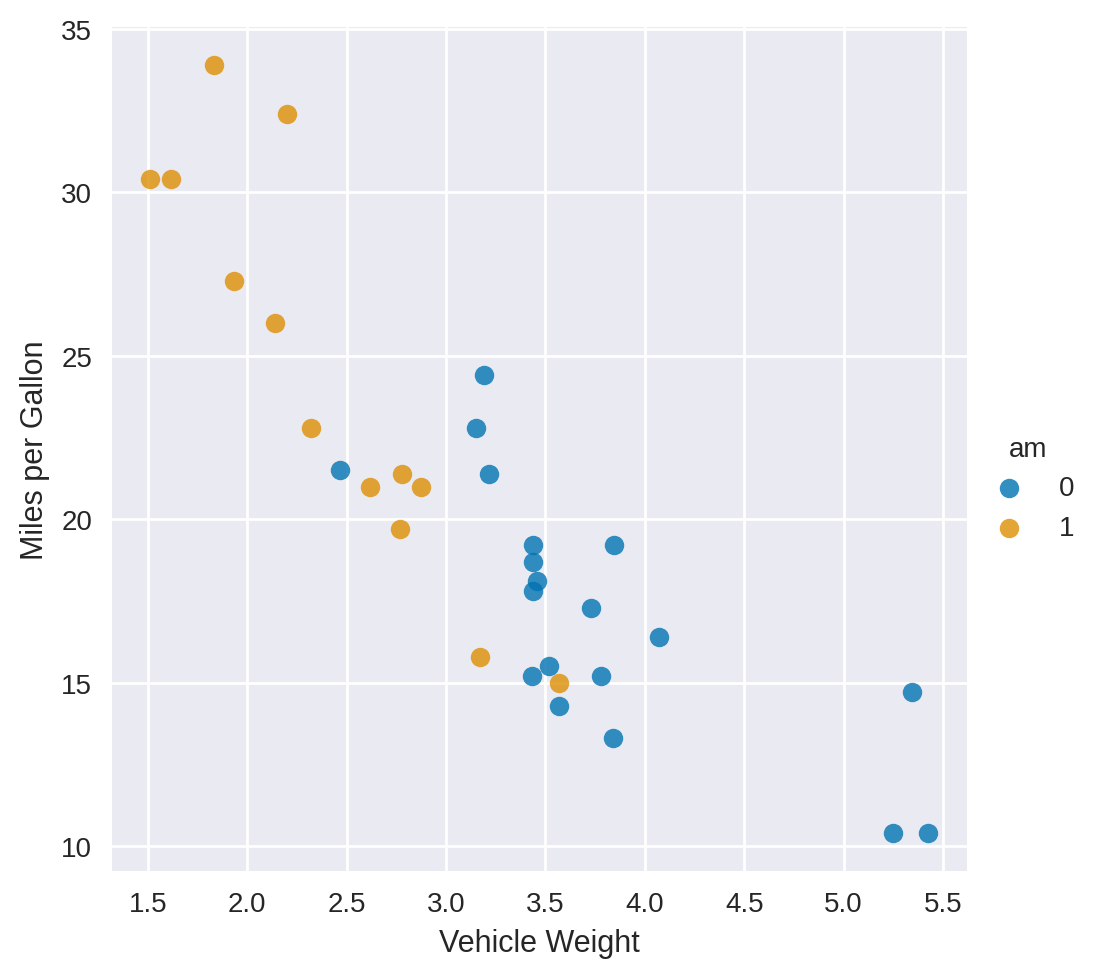

In [6]:
sns.lmplot(x="wt", y="mpg", hue="am", data=df, fit_reg=False)
plt.ylabel("Miles per Gallon")
plt.xlabel("Vehicle Weight");


In [7]:
model_1 = smf.ols(formula="mpg ~ wt + am", data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     44.17
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.58e-09
Time:                        20:20:18   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      29   BIC:                             170.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.3216      3.055     12.218      0.000      31.074      43.569
wt            -5.3528      0.788     -6.791      0.000      -6.965      -3.741
am            -0.0236      1.546     -0.015      0.988      -3.185       3.138
==============================================================================
Omnibus:                        3.009   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                2.413
Skew:                           0.670   Prob(JB):                        0.299
Kurtosis:                       2.881   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     44.17
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.58e-09
Time:                        20:20:18   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      29   BIC:                             170.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.3216      3.055     12.218      0.0

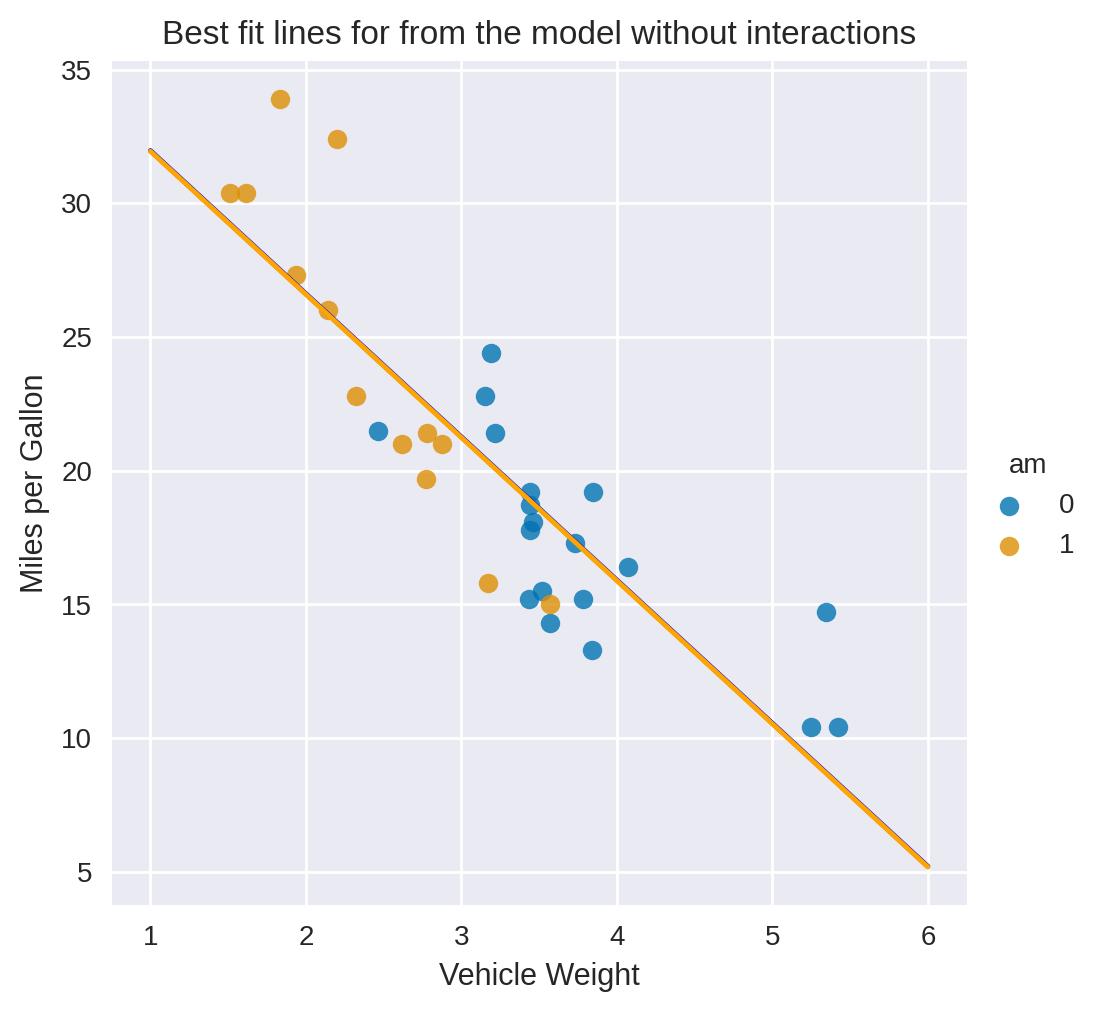

In [9]:
X = np.linspace(1, 6, num=20)
sns.lmplot(x="wt", y="mpg", hue="am", data=df, fit_reg=False)
plt.title("Best fit lines for from the model without interactions")
plt.ylabel("Miles per Gallon")
plt.xlabel("Vehicle Weight")
plt.plot(X, 37.3216 - 5.3528 * X, "blue")
plt.plot(X, (37.3216 - 0.0236) - 5.3528 * X, "orange");

In [10]:
model_2 = smf.ols(formula="mpg ~ wt + am + wt:am", data=df).fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     46.57
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           5.21e-11
Time:                        20:20:21   Log-Likelihood:                -73.738
No. Observations:                  32   AIC:                             155.5
Df Residuals:                      28   BIC:                             161.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.4161      3.020     10.402      0.000      25.230      37.602
wt            -3.7859      0.786     -4.819      0.000      -5.395      -2.177
am            14.8784      4.264      3.489      0.002       6.144      23.613
wt:am         -5.2984      1.445     -3.667      0.001      -8.258      -2.339
==============================================================================
Omnibus:                        3.839   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.088
Skew:                           0.761   Prob(JB):                        0.213
Kurtosis:                       2.963   Cond. No.                         40.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     46.57
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           5.21e-11
Time:                        20:20:21   Log-Likelihood:                -73.738
No. Observations:                  32   AIC:                             155.5
Df Residuals:                      28   BIC:                             161.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.4161      3.020     10.402      0.0

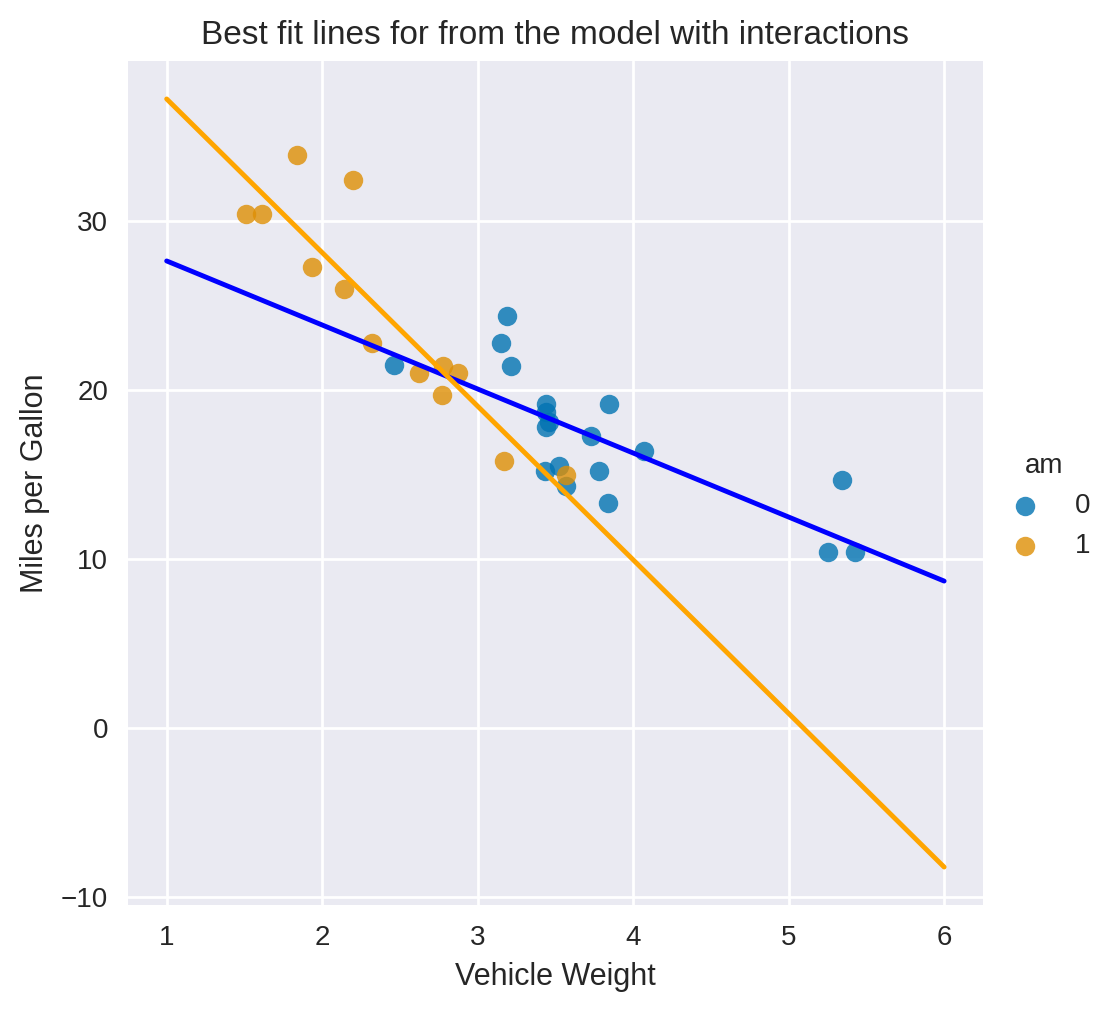

In [12]:
X = np.linspace(1, 6, num=20)
sns.lmplot(x="wt", y="mpg", hue="am", data=df, fit_reg=False)
plt.title("Best fit lines for from the model with interactions")
plt.ylabel("Miles per Gallon")
plt.xlabel("Vehicle Weight")
plt.plot(X, 31.4161 - 3.7859 * X, "blue")
plt.plot(X, (31.4161 + 14.8784) + (-3.7859 - 5.2984) * X, "orange");

In [13]:
# bonus
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True)
X_tr = poly.fit_transform(df[["wt", "am"]])
pd.DataFrame(X_tr, columns=poly.get_feature_names_out())


,1,wt,am,wt am
0,1.0,2.620,1.0,2.620
1,1.0,2.875,1.0,2.875
2,1.0,2.320,1.0,2.320
3,1.0,3.215,0.0,0.000
4,1.0,3.440,0.0,0.000
5,1.0,3.460,0.0,0.000
6,1.0,3.570,0.0,0.000
7,1.0,3.190,0.0,0.000
8,1.0,3.150,0.0,0.000
9,1.0,3.440,0.0,0.000


# CASO: Um Conjunto não Linear, Potencial de Ação de um Neurônio

Vamos empregar como exemplo um subconjunto de dados do Potencial de Ação de um neurônio. O Potencial de Ação é uma *função* que explica a ativação dos neurônios e que tem um papel importante nas neurociências e aplicações médicas. Essa é uma função claramente não linear como você pode observar pelo gráfico onde o `sns.lineplot` produz uma linha de tendência para os dados e seu intervalo de confiança. Não obstante haver uma série de modelos propostos, nós não conhecemos a *função real* desse potencial, mas podemos obter uma série de medidas no tempo (como o subconjunto empregado aqui) e buscar aproximar esses dados por algum modelo ou função.



In [14]:
import seaborn as sns
df = sns.load_dataset('dots')
df = df[(df.choice == 'T2') & (df['align'] == 'dots')]
df = df[['time','firing_rate']].reset_index(drop=True)
df.head()

,time,firing_rate
0,-80,34.970107
1,-80,36.785815
2,-80,34.478506
3,-80,34.991424
4,-80,32.241533


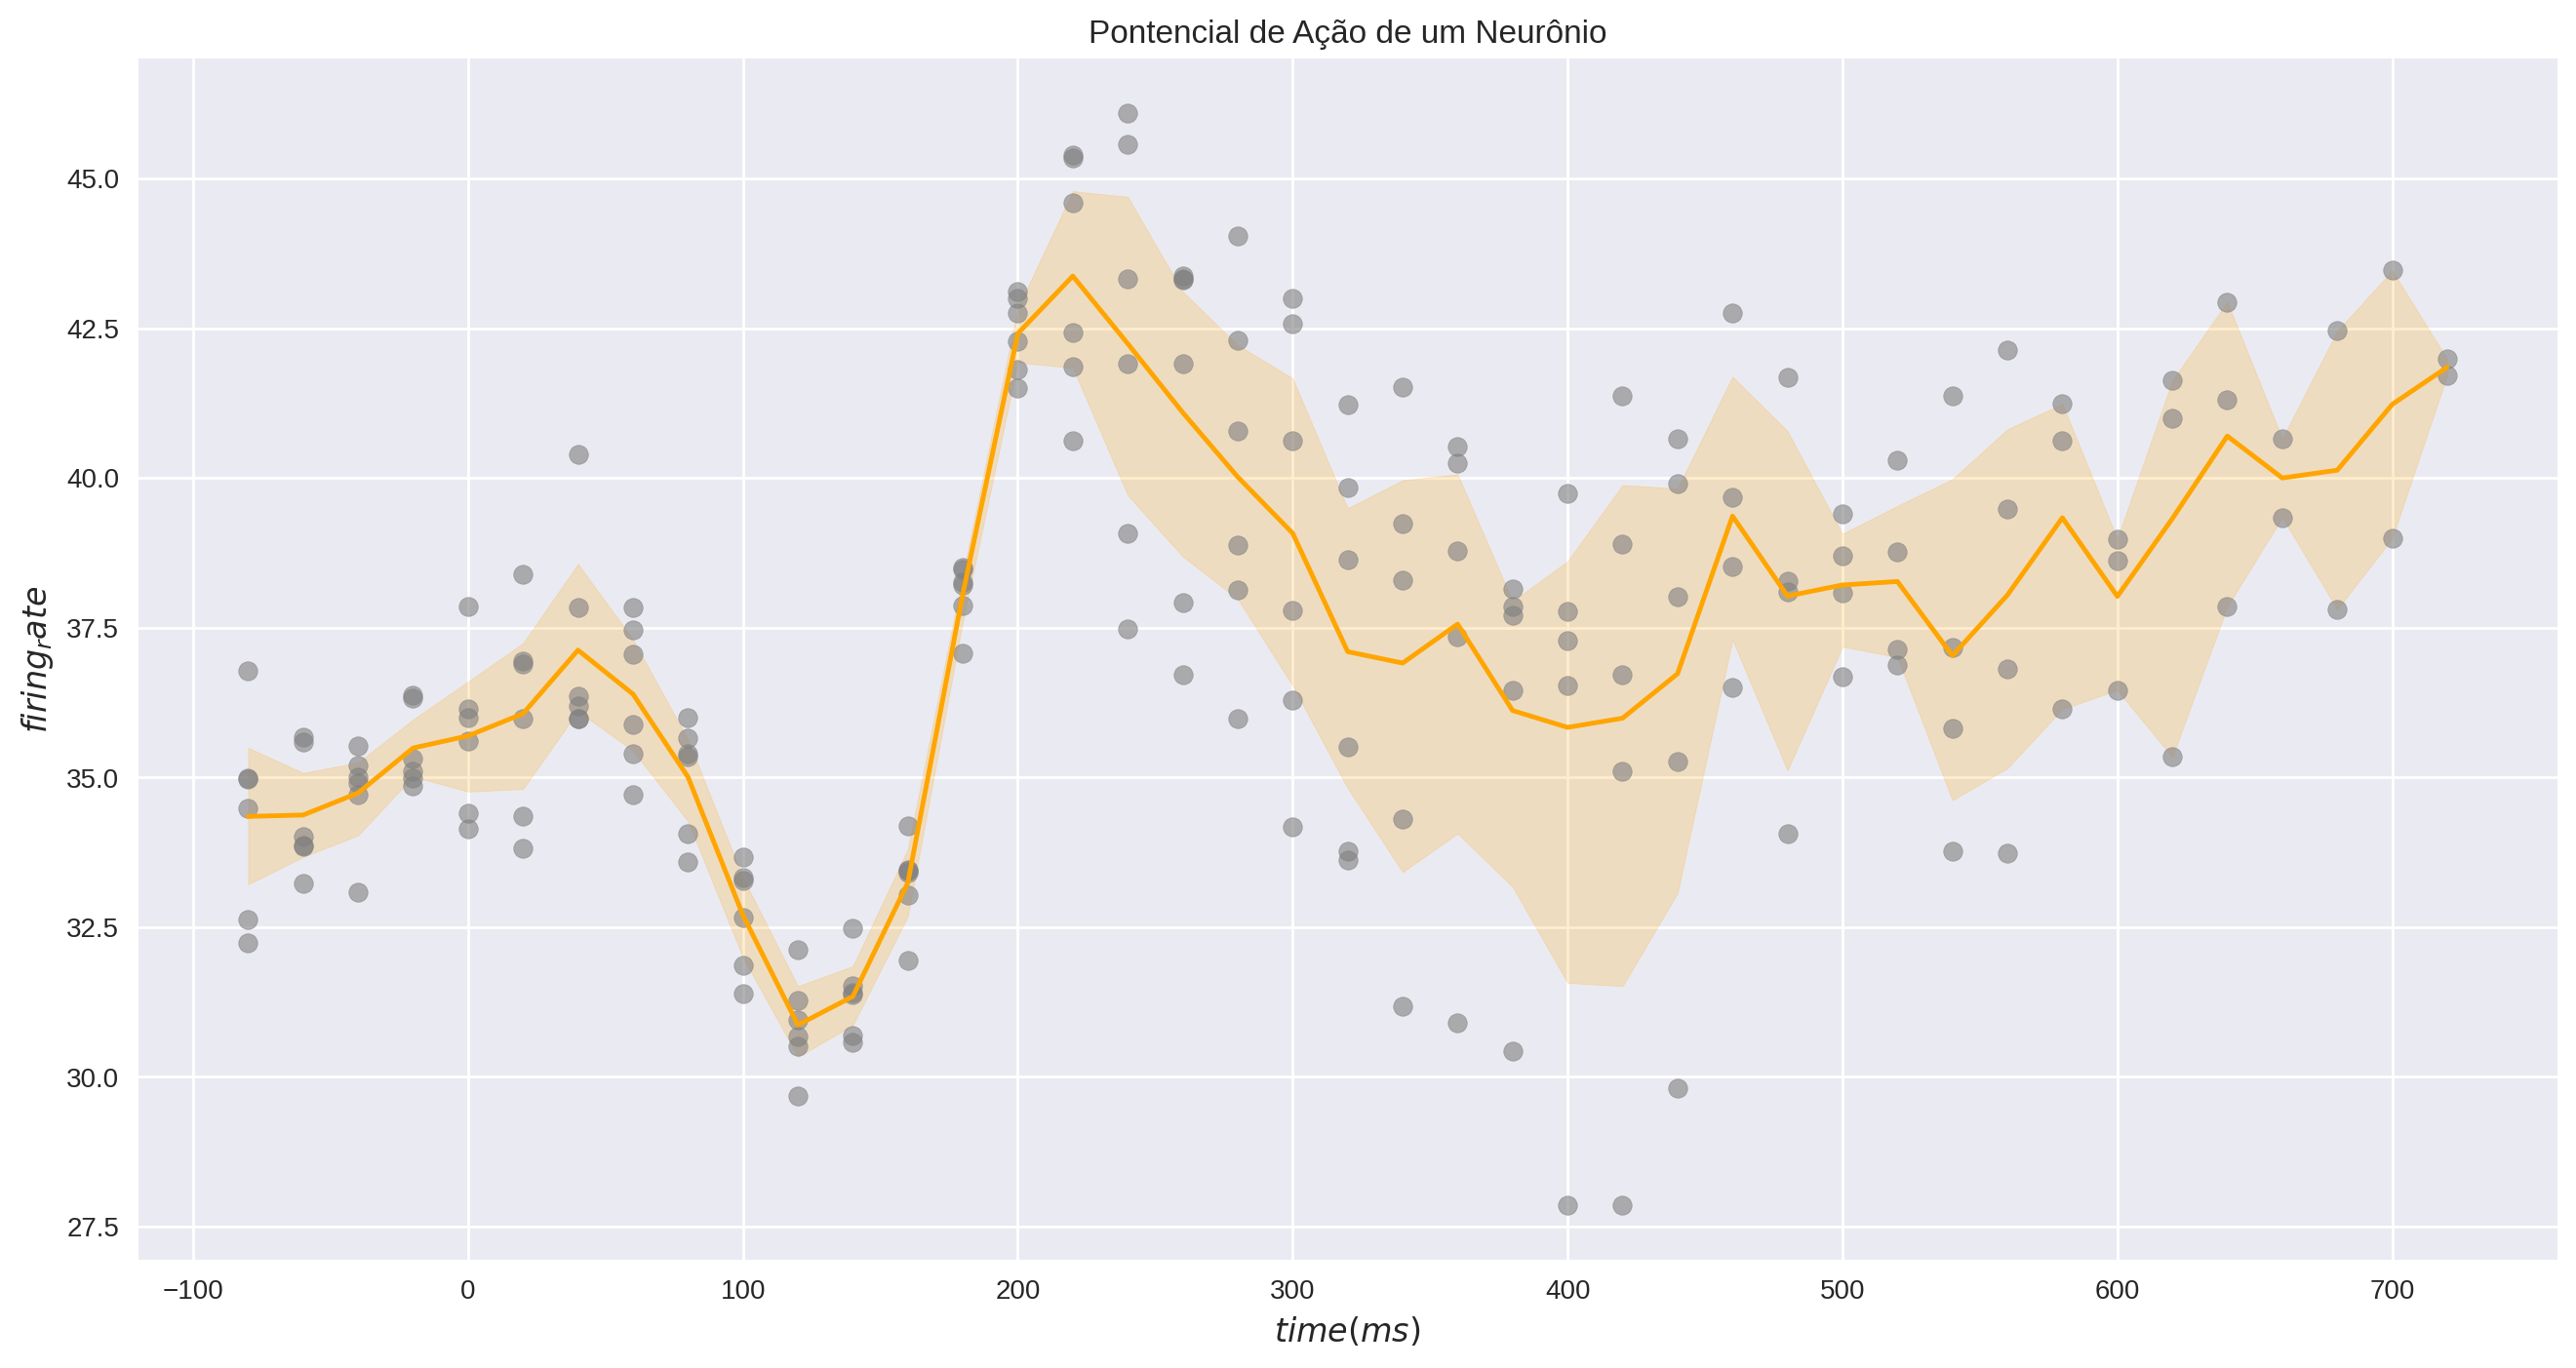

In [15]:
sns.lineplot(x=df.time, y=df.firing_rate,color='orange')
plt.scatter(x=df.time, y=df.firing_rate,color='gray',alpha=0.6)

plt.title('Pontencial de Ação de um Neurônio')
plt.xlabel('$time (ms)$',fontsize=12)
plt.ylabel('$firing_rate$',fontsize=12)
plt.show()

## Aplicando o Modelo Linear

Podemos aplicar diretamente o modelo de regressão linear como já fizemos antes e comparar nossas estimativas com os dados. Aplicamos aqui uma separação de dados de treinamento e teste para tornar a avaliação do modelo mais efetiva.

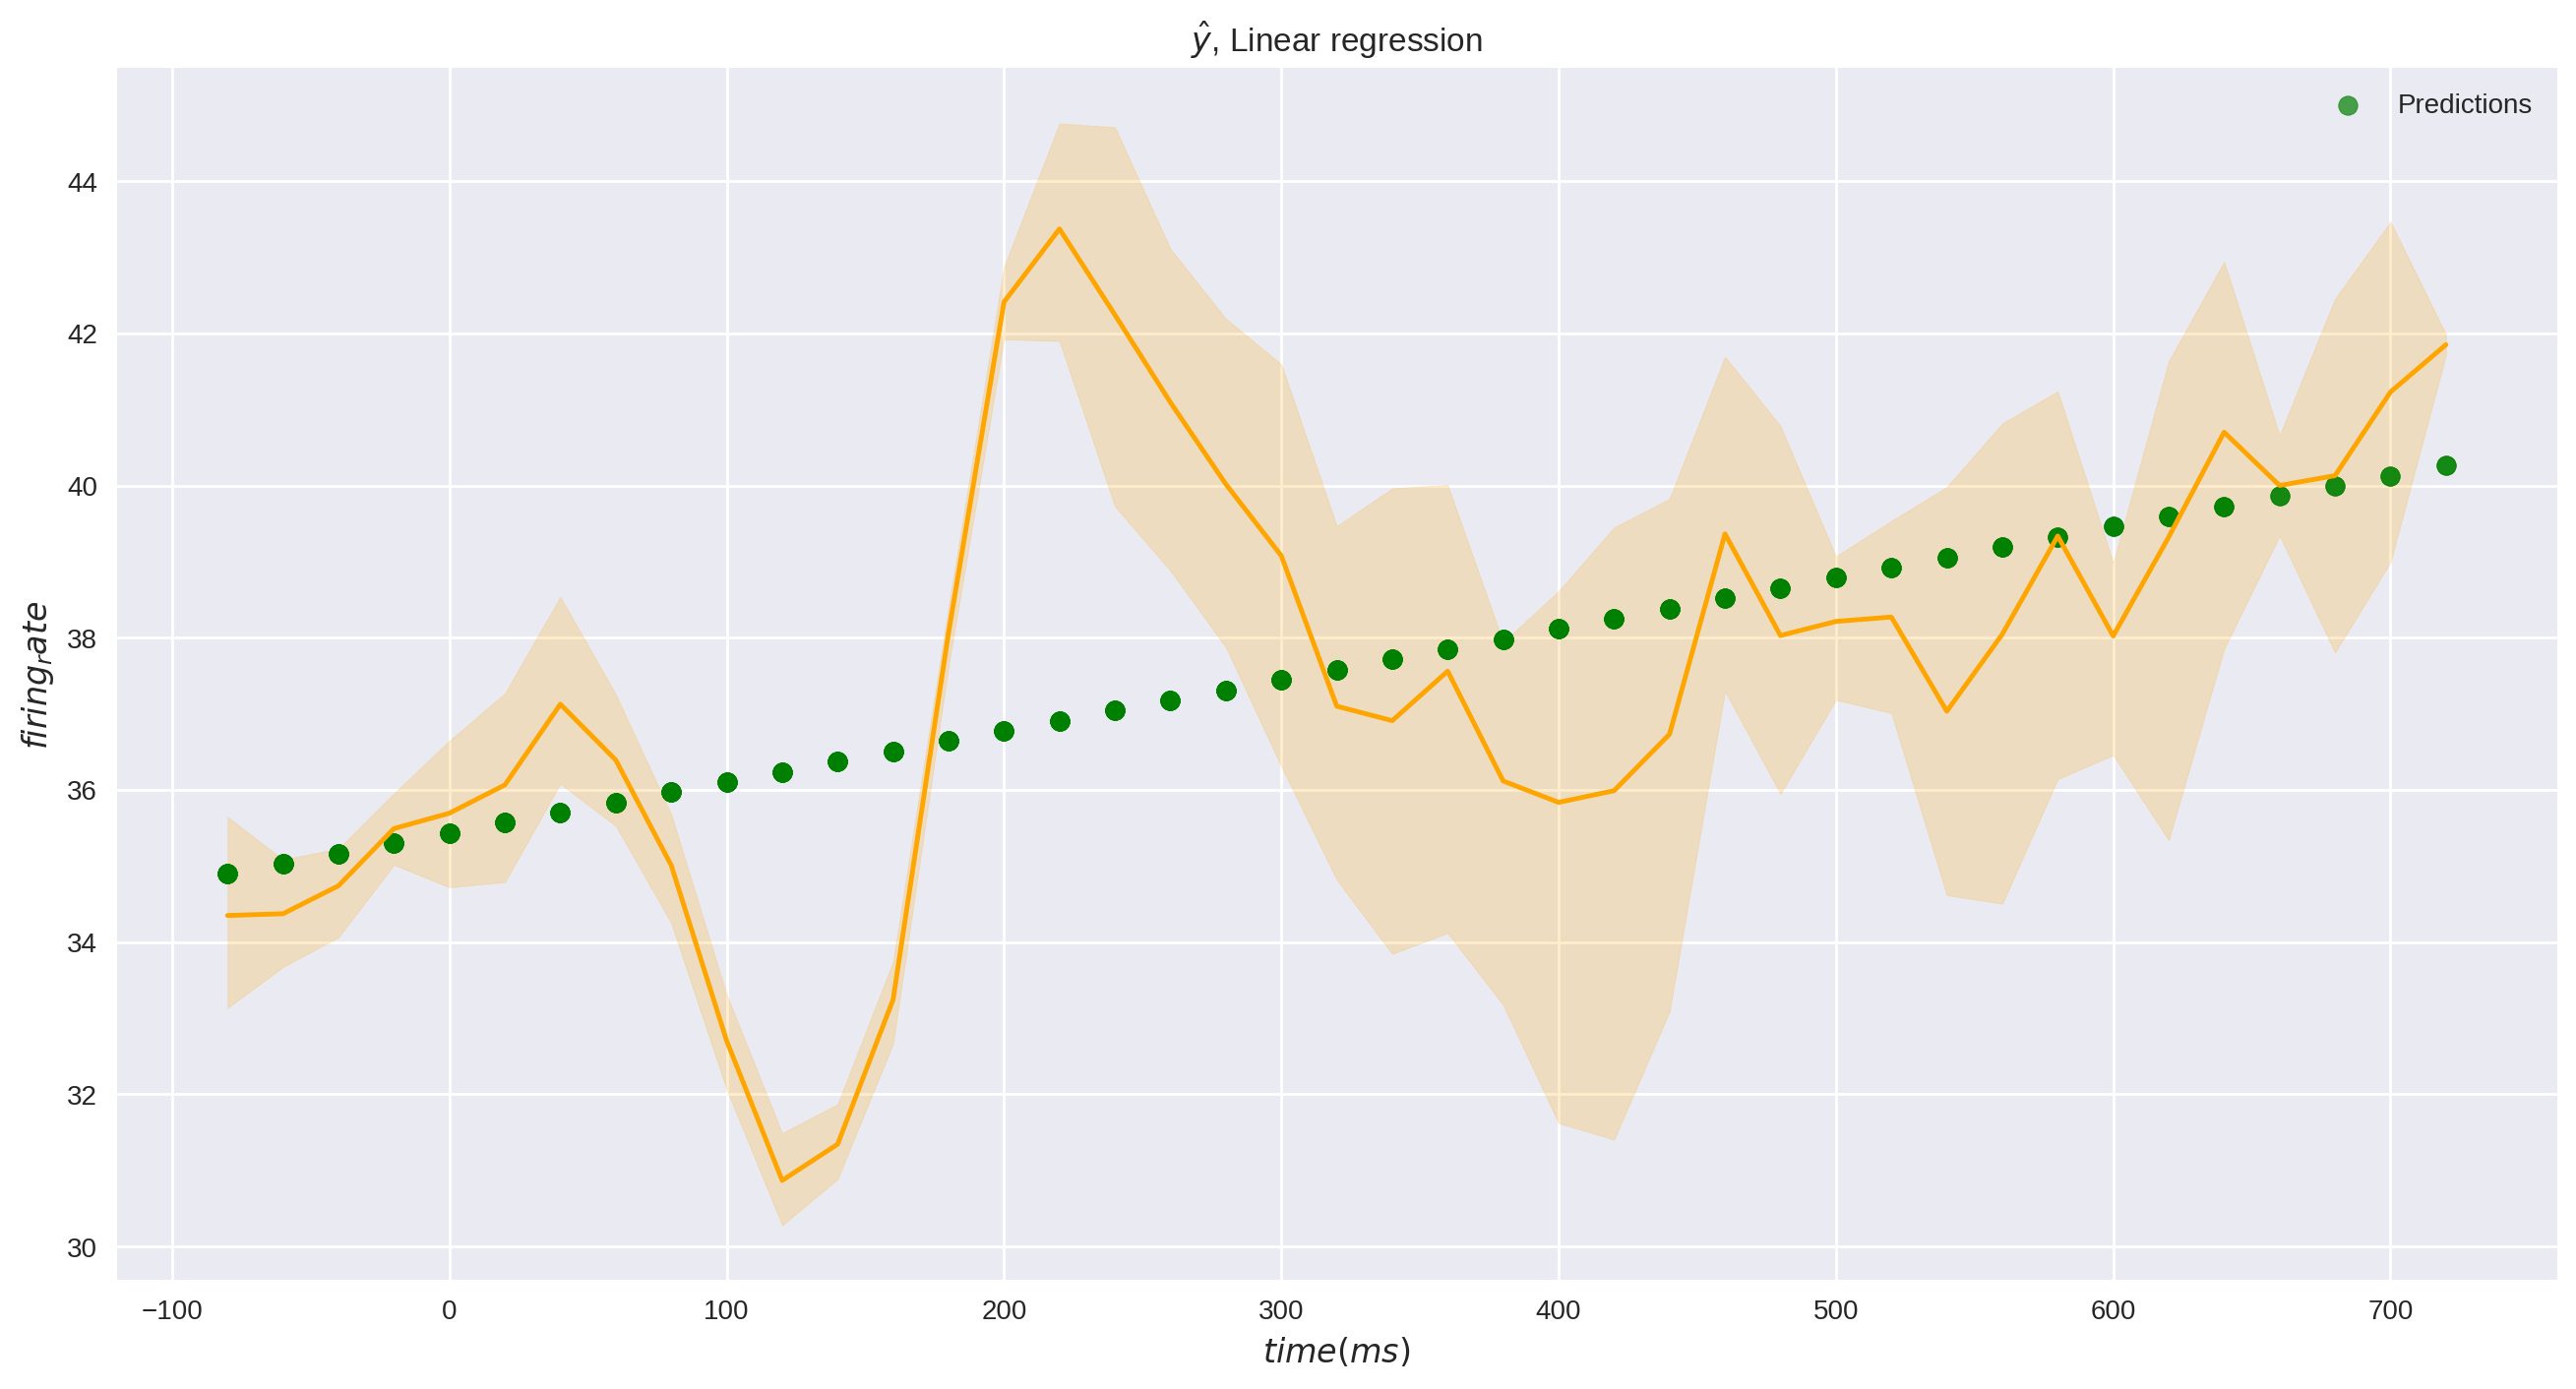

In [17]:
from sklearn import linear_model

X = df[['time']]
y = df.firing_rate

regressor = linear_model.LinearRegression()
regressor.fit(X,y)

y_pred = regressor.predict(X)

sns.lineplot(x=X.time,y=y,color='orange')
plt.scatter(X,y_pred,color='green',marker='o',alpha=0.7,label='Predictions')

plt.title('$\\hat{y}$' + ', Linear regression')
plt.xlabel('$time (ms)$',fontsize=12)
plt.ylabel('$firing_rate$',fontsize=12)
plt.legend()

plt.show()

Esse é o melhor modelo que a classe de regressores lineares pode fornecer e, de fato, você observa que ele se ajusta muito pouco aos dados. Modelos lineares não podem capturar a não linearidade da função de ativação!



## Regressores não Lineares

Existem muitos outros modelos e que empregam paradigmas bastante diferentes do modelo Linear e permitem obter aproximações *não lineares* dos dados. Você pode por exemplo pensar que podemos aproximar uma função por diferentes polinômios, com diferentes graus, ou ainda por diferentes combinações de séries de dados como as séries de Taylor e Fourier, famosas séries para aproximação de funções na matemática.

Para nós é suficiente saber que existem muitos modelos e que, por partirem de princípios de construção diferentes, levam a diferentes soluções de aproximação da função original.

Você pode ver abaixo a aplicação de 3 modelos regressores bastante empregados o **Decision Tree Regressor**, um modelo baseado em **Máquinas de Vetores de Suporte** e **XGBoosting Regressor**. Todos tem a mesma lógica de aplicação dos estimadores do scikit-learn e da regressão linear. Você pode ainda alterar o código abaixo para experimentar outros modelos que encontram-se nos imports no início do código.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor # entradas precisam ser normalizadas

base_estimators = [ DecisionTreeRegressor(),
                    SVR(),
                    XGBRegressor() ]

plt.figure(figsize=(20,4))
k = 1
for regressor in base_estimators:

  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  plt.subplot(1,3,k)
  k = k + 1
  sns.lineplot(x=X_train.time,y=y_train,color='orange')
  plt.scatter(X_test,y_pred,color='green',marker='o',alpha=0.7,label='Predictions')

  plt.title('$\\hat{y}$, ' + str(regressor),fontsize=14,weight='bold')
  plt.xlabel('$time (ms)$',fontsize=12)
  plt.ylabel('$firing_rate$',fontsize=12)
  plt.legend()

plt.show()



Neste exemplo omitimos por simplicidade a busca dos melhores modelos ou mesmo a a busca em grade por melhores hiperparâmetros, limitando-nos simplesmente a construir os diferentes modelos.

Mas você já pode perceber que podemos aplicar o mesmo raciocínio empregado antes para os classificadores, definindo uma métrica de regressão para os melhores modelos e selecionando assim modelos e hiperparâmetros que mais se ajustam aos dados. É o que fazemos a seguir.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor # entradas precisam ser normalizadas

X = df[['time']]
y = df.firing_rate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

base_estimators = [ MLPRegressor(max_iter=8000),
                    DecisionTreeRegressor(),
                    SVR(),
                    XGBRegressor() ]

param_grids = [ {'hidden_layer_sizes':[(32,),(8,8),(8,16,8)], 'activation': ['logistic','tanh'], 'solver':['sgd', 'adam']},
                {'max_depth':[3,4,5]},
                {},
                {}]

save_estimators = []

for i in range(len(base_estimators)):
  reg = GridSearchCV(base_estimators[i], param_grids[i], cv=5, scoring='neg_mean_squared_error')
  reg.fit(X_train, y_train)
  # print(clf.cv_results_)
  print(reg.best_estimator_)
  save_estimators.append(reg.best_estimator_)
  print()
  print("MSE Mean Square Error:")
  print()
  y_pred = reg.predict(X_test)
  print(reg.score(X_test, y_test))
  print()


In [ ]:
save_estimators

Empregamos agora 4 diferentes regressores e diferentes hiperparâmetros. A escolha recai sobre a melhor métrica de **MSE (Mean Square Error)**, uma métrica comum para regressores onde medimos o erro médio com relação a predição e os dados do conjunto de teste. Diferentemente da acuracidade (uma métrica para classificação) aqui o melhor modelo é o que apresenta o menor erro médio. Nos estimadores acima nossa escolha recairia sobre o modelo `DecisionTreeRegressor(max_depth=4)`.




# Lidando com outliers com modelos robustos de regressão linear

O Modelo de Regressão Linear assume que as distribuições de probabilidade dos recursos (as entradas) são bem comportadas, por exemplo, elas seguem a distribuição gaussiana com homocedasticidade (variância constante). Entretanto, nem sempre essa premissa se verifica.




## Outliers

Outliers são um dos problemas que podemos encontrar. Eles são valores fora da distribuição esperada e podem ser encontrados tanto nas características quanto na variável alvo. Como consequência dos outliers o modelo pode ser enviesado em direção aos outliers.

Há muitas abordagens de ser lidar com outliers, sendo a mais simples removê-los das observações. Aqui empregamos algoritmos ou métodos "*robustos*" que lidam diretamente com os outliers.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import (LinearRegression, HuberRegressor,
                                  RANSACRegressor, TheilSenRegressor)

# settings
sns.set_theme(context="talk", palette="tab10", color_codes=True, rc={"figure.figsize": [7, 4]})
%config InlineBackend.figure_format = "retina"

## Dados

Vamos empregar dados fictícios (ver referências) em duas dimensões apenas para podermos observar os efeitos de cada algoritmo.


In [ ]:
N_SAMPLES = 500
N_OUTLIERS = 25

X, y, coef = datasets.make_regression(
    n_samples=N_SAMPLES,
    n_features=1,
    n_informative=1,
    noise=20,
    coef=True,
    random_state=42
)

coef_list = [["original_coef", float(coef)]]

# add outliers
np.random.seed(42)
X[:N_OUTLIERS] = 10 + 0.75 * np.random.normal(size=(N_OUTLIERS, 1))
y[:N_OUTLIERS] = -15 + 20 * np.random.normal(size=N_OUTLIERS)

plt.scatter(X, y);

In [ ]:
# sanity check - see what the coefficient would be when fitted to data without outliers
lr = LinearRegression().fit(X[N_OUTLIERS:], y[N_OUTLIERS:])
lr.coef_[0]

## Regressão Linear

Veja neste exemplo o impacto dos outliers na regressão linear.

In [ ]:
lr = LinearRegression().fit(X, y)
coef_list.append(["linear_regression", lr.coef_[0]])

In [ ]:
plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)

fit_df

In [ ]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Linear regression on data with outliers");

## Huber Regression

A regressão de Huber é um exemplo de um algoritmo de regressão robusto que atribui menos peso a observações identificadas como outliers. Lembre que o modelo linear minimiza uma função de perda que minimiza a distância entre os valores reais da variável alvo e os valores previstos, a idea da regressão de Huber é minimizar uma função de perda que atribui menos peso a observações identificadas como outliers.

$$
\min\limits_{\omega,\sigma}\sum\limits_{i=1}^{n}(\sigma+H_{\epsilon}(\frac{X_i\omega-y_i}{\sigma})\sigma)+\alpha\|\omega\|2^2$$

Onde $\sigma$ é o desvio padrão, $X_i$ representa o conjunto de características, $y_i$ é a variável alvo da regressão, $\omega$ é o vetor dos coeficientes estimados e $\alpha$ é o parâmetro de regularização. $H$ é empregado tratar de forma diferenciada os outliers:

$$H_{\epsilon}(z)=\begin{cases} z^2, & \text{if}|z|<\epsilon \\ 2\epsilon|z|-\epsilon^2, & \text{otherwise}\end{cases}$$

A perda de Huber identifica outliers considerando os resíduos, denotados por $z$. Se a observação for considerada regular (porque o valor absoluto do resíduo é menor que algum limite $\epsilon$), então aplique a função de perda quadrada. Caso contrário, a observação é considerada um outlier e você aplica a perda absoluta. Em resumo, a perda de Huber é basicamente uma combinação das funções de perda quadrada e absoluta.

<br>
<br>

<small>
Nota: a diferença absoluta leva a um estimador imparcial em torno da mediana, a diferença quadrática em torno da média. A mediana sendo menos sensível a outliers.

In [ ]:
huber = HuberRegressor().fit(X, y)
fit_df["huber_regression"] = huber.predict(plotline_X)
coef_list.append(["huber_regression", huber.coef_[0]])

In [ ]:
fix, ax = plt.subplots()
fit_df["huber_regression"].plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Huber regression on data with outliers");

## RANSAC Regression

A regressão de consenso de amostra aleatória (RANSAC) é um algoritmo não determinístico que tenta separar os dados de treinamento em inliers (que podem estar sujeitos a ruído) e outliers. Então, ele estima o modelo final usando apenas os inliers.

Com a regressão RANSAC, você também pode inspecionar as observações que o modelo considerou como inliers e outliers.

In [ ]:
ransac = RANSACRegressor(random_state=42).fit(X, y)
fit_df["ransac_regression"] = ransac.predict(plotline_X)
ransac_coef = ransac.estimator_.coef_
coef_list.append(["ransac_regression", ransac.estimator_.coef_[0]])

In [ ]:
fix, ax = plt.subplots()
fit_df["ransac_regression"].plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("RANSAC regression on data with outliers");

In [ ]:
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask
print(f"Total outliers: {sum(outlier_mask)}")
print(f"Outliers we have added ourselves: {sum(outlier_mask[:N_OUTLIERS])} / {N_OUTLIERS}")

In [ ]:
plt.scatter(X[inlier_mask], y[inlier_mask], color="blue", label="Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], color="red", label="Outliers")
plt.title("RANSAC - outliers vs inliers");

## Theil-Sen

O último dos algoritmos de regressão robustos disponíveis scikit-learné a regressão Theil-Sen . É um método de regressão não paramétrico, o que significa que não faz nenhuma suposição sobre a distribuição de dados subjacente. Em resumo, envolve ajustar vários modelos de regressão em subconjuntos dos dados de treinamento e, em seguida, agregar os coeficientes na última etapa.

In [ ]:
theilsen = TheilSenRegressor(random_state=42).fit(X, y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression", theilsen.coef_[0]])

In [ ]:
fix, ax = plt.subplots()
fit_df["theilsen_regression"].plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Theil-Sen regression on data with outliers");

## Conclusão

Em geral, é difícil um ajuste robusto em alta dimensão, mas esses modelos **são em geral uma melhor alternativa à simplesmente eliminar (excluir) os outliers. Note que, diferentemente do Theil-Sen e RANSAC, a regressão de Huber não filtra completamente os outliers, mas apenas diminui seu efeito no ajuste. Mas a regressão de Huber deve ser bastante mais rápida que a RANSAC e a Theil-Sen, que ajustam vários subconjuntos menores de dados. O RANSAC é mais rápido que o Theil-Sen, escala melhor com o número de amostras, e lida melhor com valores discrepantes na direção $y$, que é o cenário mais comum.

In [ ]:
pd.DataFrame(coef_list, columns=["model", "coef"]).round(2)

In [ ]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax)
plt.scatter(X, y, c="k")
plt.title("Comparison of robust regression algorithms");

#### Referências

Lewinson,E. (2022) [Dealing with Outliers Using Three Robust Linear Regression Models](https://developer.nvidia.com/blog/dealing-with-outliers-using-three-robust-linear-regression-models/)